In [11]:
import pandas as pd

# Specify the input file
input_file = '../data/data_clustered.csv'

# Load the clustered data
df = pd.read_csv(input_file)


cluster
0    223737
1    496049
2    225273
3     44803
4    421338
5    187659
6    118147
7    442848
8    128220
Name: count, dtype: int64


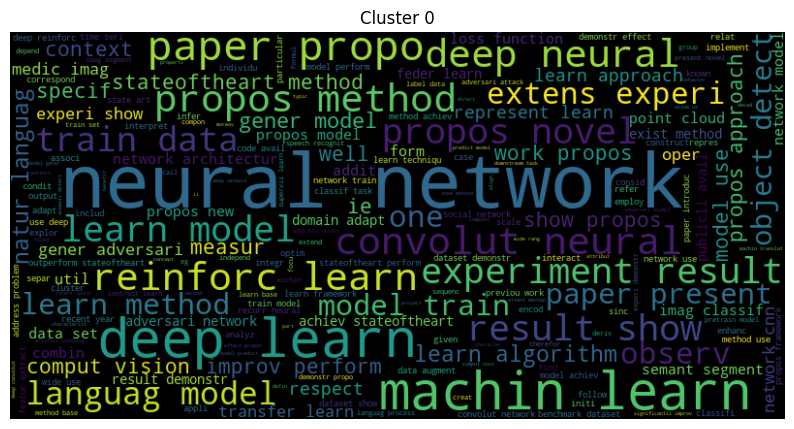

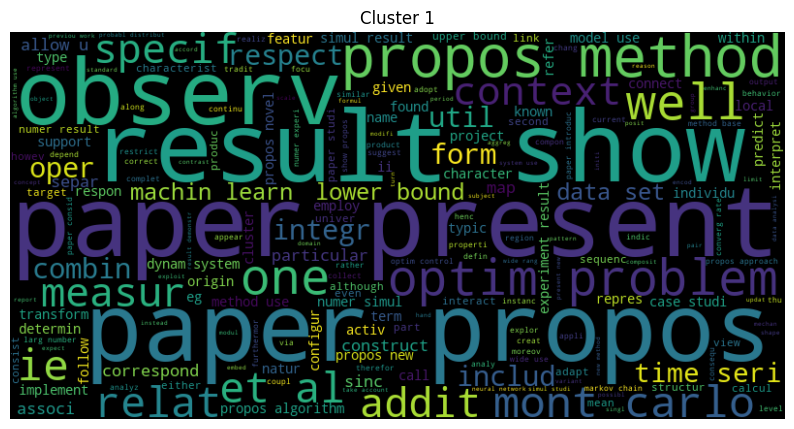

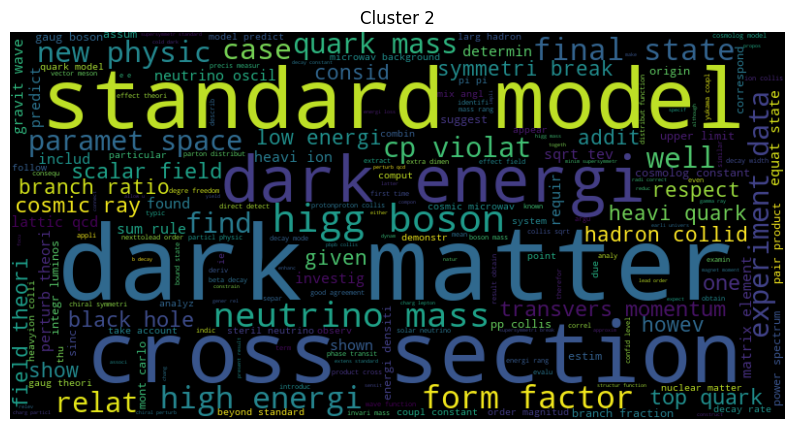

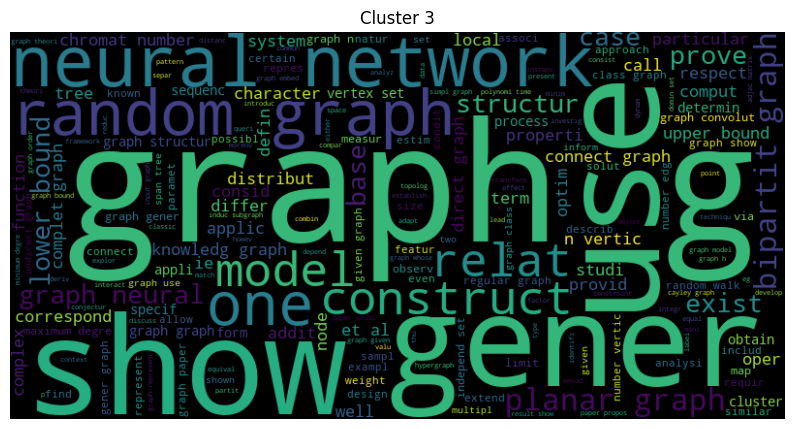

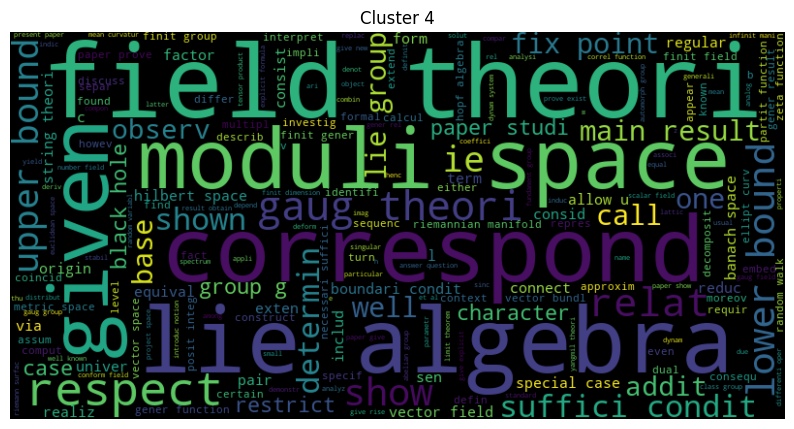

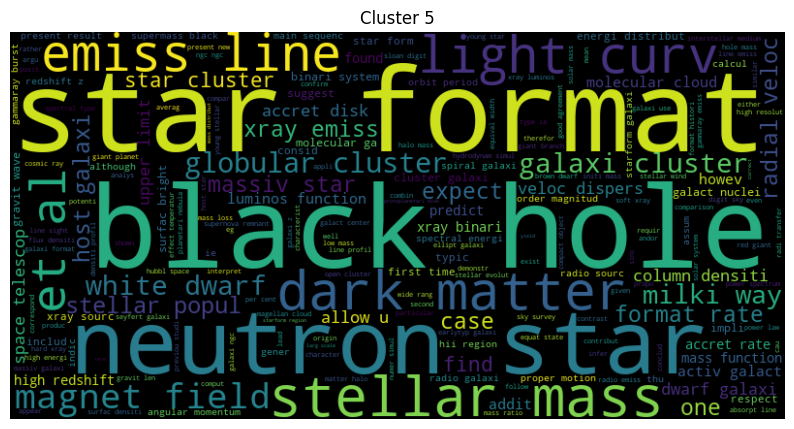

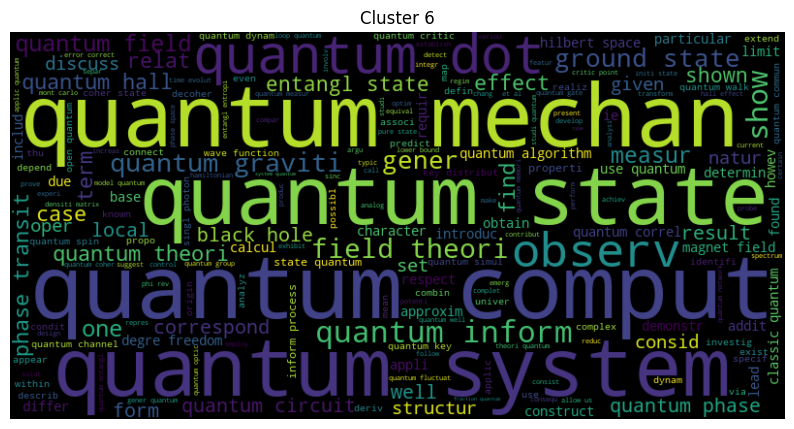

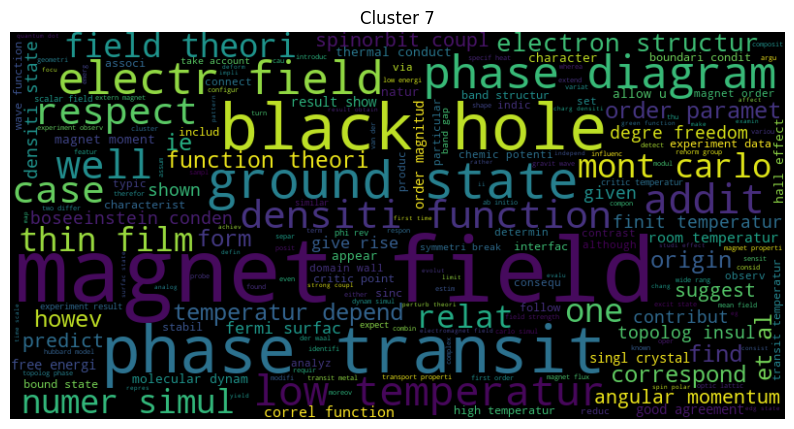

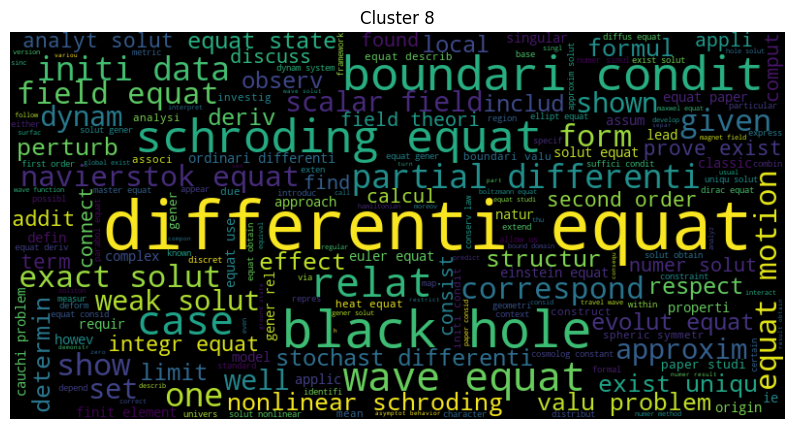

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['concat'] = df['concat'].fillna('')

# Analyze the distribution of clusters
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Generate word clouds for each cluster
for cluster in cluster_counts.index:
    text = ' '.join(df[df['cluster'] == cluster]['concat'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')
    plt.show()


In [14]:
# Extract the primary category of each article
df['primary_category'] = df['categories'].apply(lambda x: x.split()[0])

# Analyze the distribution of primary categories in each cluster
category_counts = df.groupby('cluster')['primary_category'].value_counts()
print(category_counts)


cluster  primary_category
0        cs.CV               62654
         cs.LG               43824
         cs.CL               23582
         eess.IV              9441
         stat.ML              5710
                             ...  
8        hep-ex                  2
         plasm-ph                2
         cs.HC                   2
         ao-sci                  1
         cmp-lg                  1
Name: count, Length: 1427, dtype: int64


In [15]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

# Analyze the distribution of clusters over time
cluster_year_counts = df.groupby('year')['cluster'].value_counts()
print(cluster_year_counts)

# Analyze the distribution of primary categories over time
category_year_counts = df.groupby('year')['primary_category'].value_counts()
print(category_year_counts)


year
2007    145854
2008     69333
2009    229052
2010     56199
2011     61841
2012     57296
2013     72028
2014     88118
2015    215106
2016    133626
2017    122520
2018    136216
2019    155679
2020    177519
2021    193583
2022    215220
2023    158884
Name: count, dtype: int64
year  cluster
2007  4          42555
      7          29690
      1          18899
      2          18680
      5          12929
                 ...  
2023  6           8122
      2           8018
      5           7235
      8           7045
      3           4305
Name: count, Length: 153, dtype: int64
year  primary_category
2007  astro-ph            19445
      hep-ph              12538
      quant-ph             9022
      hep-th               8136
      math.AG              4960
                          ...  
2023  q-alg                   4
      cs.GL                   3
      q-fin.EC                2
      cond-mat                2
      alg-geom                1
Name: count, Length: 2648, dtype:

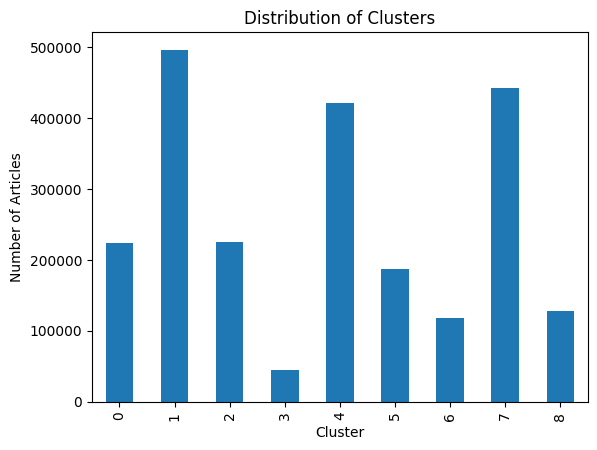

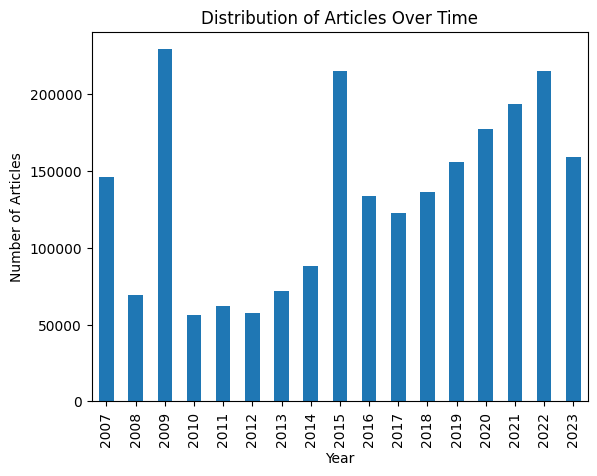

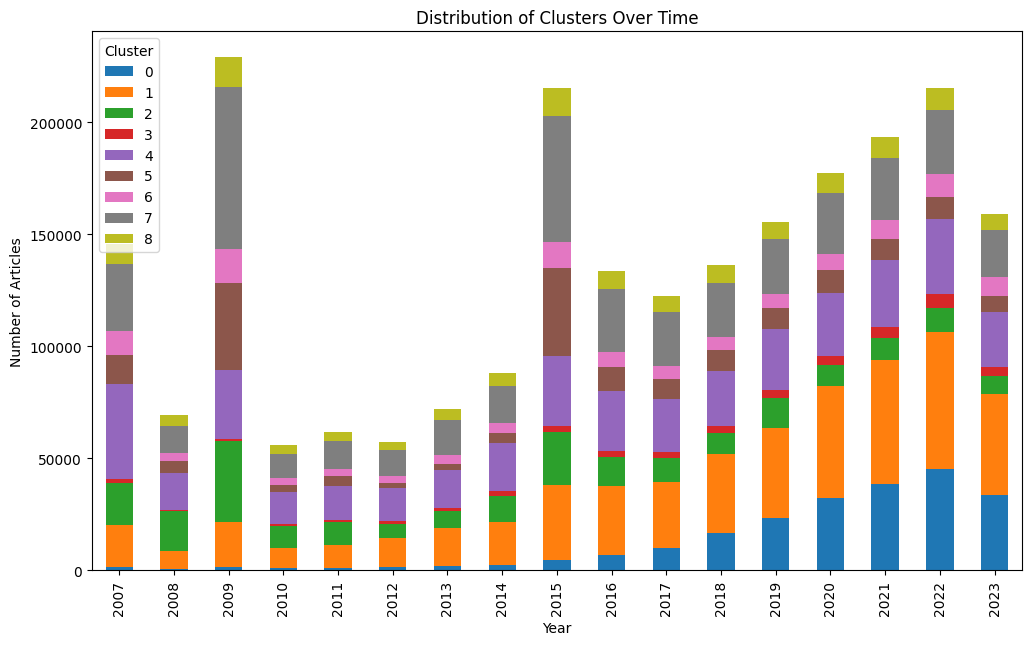

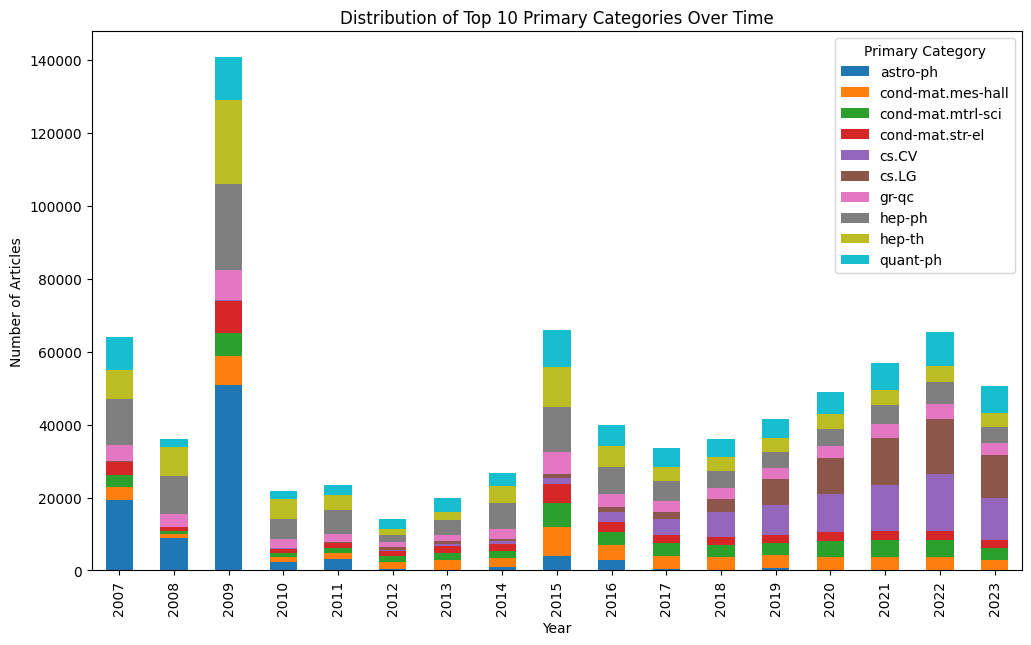

In [16]:
# Visualize the distribution of clusters
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters')
plt.show()

# Visualize the distribution of articles over time
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles Over Time')
plt.show()

# Visualize the distribution of clusters over time
cluster_year_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters Over Time')
plt.legend(title='Cluster')
plt.show()

# Visualize the distribution of primary categories over time
top_categories = df['primary_category'].value_counts().index[:10]
category_year_counts = category_year_counts.reset_index(name='count')
category_year_counts = category_year_counts[category_year_counts['primary_category'].isin(top_categories)]
category_year_counts.pivot(index='year', columns='primary_category', values='count').plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Top 10 Primary Categories Over Time')
plt.legend(title='Primary Category')
plt.show()
